In [ ]:
# Pytorch pipeline
# 1. Design model (input dimensions, output dimensions, forward pass) 
# 2. choose loss and optimiser, initialise them
# 3. training loop :
#     forward pass
#     backward pass, gradient calculation, 
#     update weights, empty gradients

In [1]:
import torch
import torch.nn as nn #neural network module
import numpy as np
from sklearn import datasets 
from torch.optim import SGD
import matplotlib.pyplot as plt


In [15]:
# Step 0 - preparing data
X_numpy, Y_numpy = datasets.make_regression(n_samples=200,n_features=1,noise=20,random_state=47)
input = torch.tensor(X_numpy,requires_grad=True,dtype=torch.float32)
output = torch.tensor(Y_numpy,requires_grad=True,dtype=torch.float32)

#weight are in floats, hence we need to convert data into floats

#different implementation
# input = torch.from_numpy(X_numpy.astype(np.float32))
# input.requires_grad_(True)

# output = torch.from_numpy(Y_numpy.astype(np.float32))
# output.requires_grad_(True)

#converting outputs into a column matrix/vector
output = output.view(-1,1)

n_samples, n_features = input.shape
n_samples, n_features = input.size()


In [19]:
#Step 1 - Designing the model

model = nn.Linear(n_features,1)

In [32]:
#Step 2 - Loss & Optimiser
learning_rate = 0.01
loss_func = nn.MSELoss()
optimiser =SGD(model.parameters(),lr=learning_rate)

Loss in epoch 1 is 335.0197
Loss in epoch 11 is 334.1602
Loss in epoch 21 is 333.6003
Loss in epoch 31 is 333.2355
Loss in epoch 41 is 332.9979
Loss in epoch 51 is 332.8431
Loss in epoch 61 is 332.7423
Loss in epoch 71 is 332.6766
Loss in epoch 81 is 332.6338
Loss in epoch 91 is 332.6059


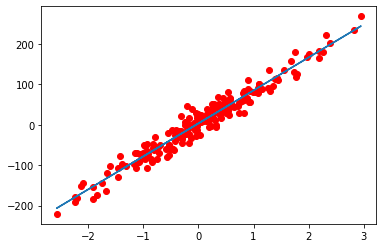

In [33]:
#Step 3 - Training loop
epochs = 100
for epoch in range(epochs):
    #forward pass
    y_est = model(input)
    loss = loss_func(output,y_est)
    #backward pass
    loss.backward()
    #weight updatation
    with torch.no_grad():
        optimiser.step()
    optimiser.zero_grad()

    if epoch%10 == 0:
        print(f"Loss in epoch {epoch+1} is {loss.item():.4f}")

#plots
predicted_outputs = model(input).detach().numpy() #we dont want it to be tracked by computation graph
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted_outputs)
plt.show()